In [10]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.datasets import make_blobs, make_moons, load_breast_cancer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()

# звдаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

#добавим к данным шумовые признаки
# первые 3- признаков являются исходными, остальные 50 явяются шумовывми
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select.transform(X_train)
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (284, 80)
форма массива X_train_selected: (284, 40)


Text(0.5,0,'Индекс примера')

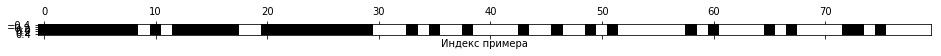

In [12]:
mask = select.get_support()
# визуализируем булевые значения черный – True, белый – False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Индекс примера')

In [13]:
from sklearn.linear_model import LogisticRegression
# преобразовываем тестовые данные
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Правильность со всеми признаками: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Правильность только с отобранными признаками: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Правильность со всеми признаками: 0.930
Правильность только с отобранными признаками: 0.940


# Отбор признаков на основе модели

In [14]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [15]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print ('форма обуч набора X: {}'.format(X_train.shape))
print ('форма обуч набора X с l1: {}'.format(X_train_l1.shape))

форма обуч набора X: (284, 80)
форма обуч набора X с l1: (284, 40)


Text(0.5,0,'Индекс примера')

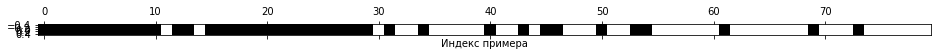

In [16]:
mask = select.get_support()
# визуализируем булевые значения черный – True, белый – False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Индекс примера')

In [17]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print ('Правильность на тестовом наборе: {:.3f}'.format(score))

Правильность на тестовом наборе: 0.951


# Итеративны отбор признаков

Text(0.5,0,'Индекс примера')

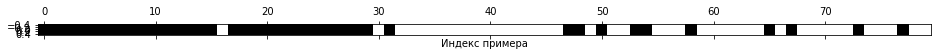

In [18]:
# recursive feature elimination, RFE
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# визуализируем отобраные прзнаки
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Индекс примера')

In [20]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.951


In [21]:
print("Правильность на тестовом наборе: {:.3f}".format(select.score(X_test, y_test)))

Правильность на тестовом наборе: 0.951
